# MNIST データ
(https://www.dropbox.com/s/qos6njxc48zrs3f/train_small.csv?dl=0)
少し小さくしたデータ  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [10]:
data = pd.read_csv('train_small.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# label で sort
data = data.sort_values('label').reset_index().drop('index', axis=1)

In [14]:
data.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data.tail(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
198,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


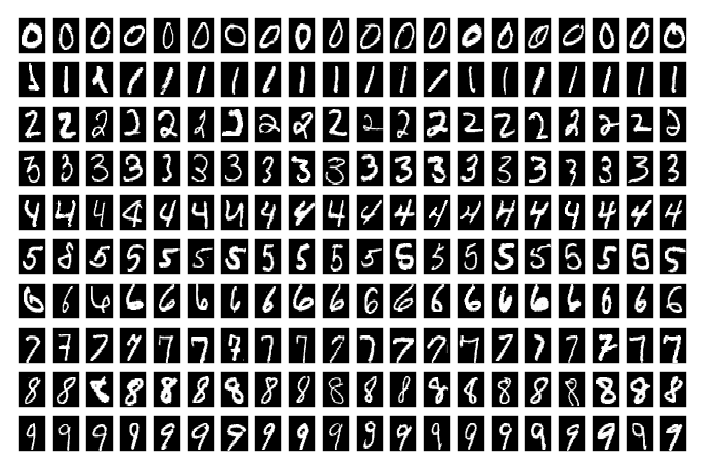

In [28]:
plt.figure()

size = 28

for i in range(len(data)):
    X, Y = np.meshgrid(range(size), range(size))
    Z = data.values[i][1:].reshape(size, size)
    Z = Z[::-1, :] # flip vertical
    plt.subplot(10, 20, i+1)
    plt.pcolor(X, Y, Z)
    plt.flag()
    plt.gray()
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)
plt.show()

## 各データの相関
相関行列をプロットする。28x28=784 の画像データを、784次元ベクトルで各要素をグレースケールの濃さとして相関行列を作る。

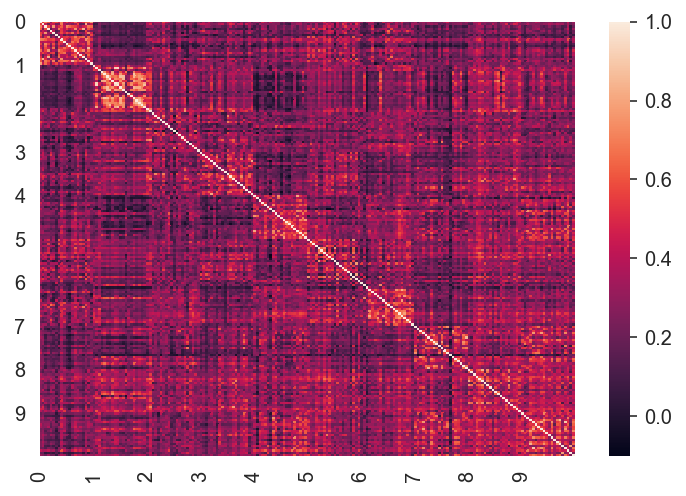

In [34]:
data_mat = []

# convert list to ndarray
for i in range(len(data)):
    label = data['label'][i]
    data_mat.append(data.values[i][1:])

A = np.array(data_mat)
Z = np.corrcoef(A)      # generate correlation matrix

area_size = len(data)
X, Y = np.meshgrid(range(area_size),range(area_size)) 

sns.heatmap(Z)
plt.xticks([(i * 20) for i in range(10)],range(10))
plt.yticks([(i * 20) for i in range(10)],range(10))
plt.show()

<Figure size 432x288 with 0 Axes>

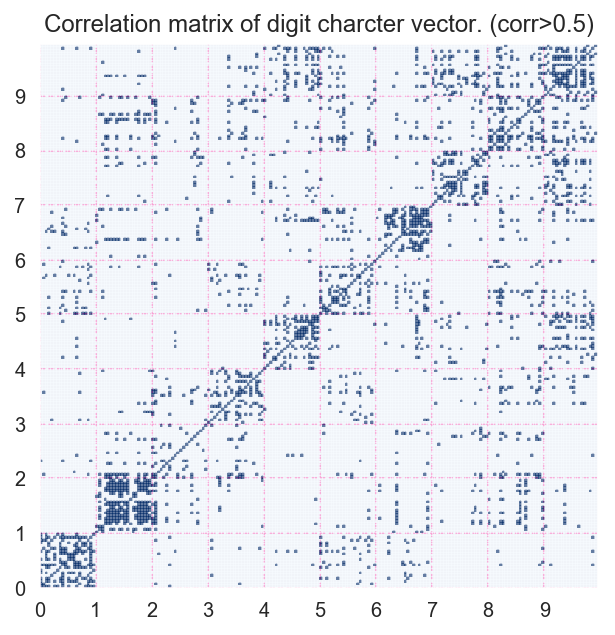

In [36]:
plt.clf()
plt.figure(figsize=(5, 5))
plt.xlim(0,area_size-1)
plt.ylim(0,area_size-1)
plt.title("Correlation matrix of digit charcter vector. (corr>0.5)")

thresh = .5 
Z1 = Z.copy()
Z1[Z1 > thresh] = 1
Z1[Z1 <= thresh] = 0

plt.pcolor(X, Y, Z1, cmap=cm.get_cmap('Blues'),alpha=0.6)
plt.xticks([(i * 20) for i in range(10)],range(10))
plt.yticks([(i * 20) for i in range(10)],range(10))
plt.grid(color='deeppink',linestyle='--')
plt.show()

## ブロックごとの平均値

<Figure size 432x288 with 0 Axes>

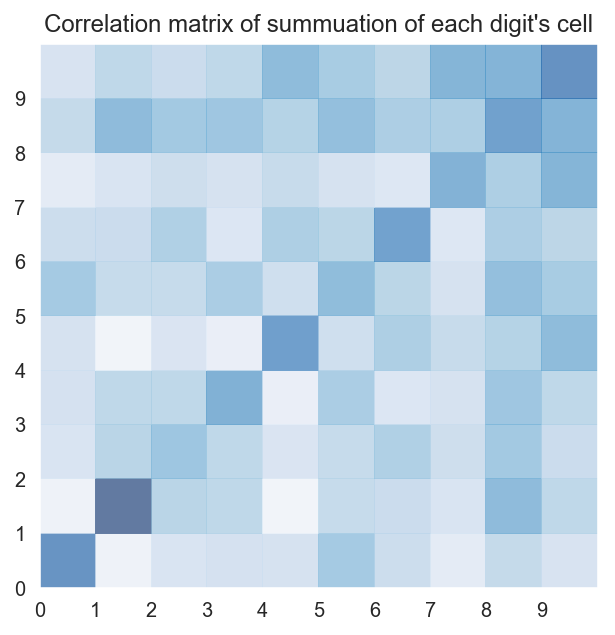

In [40]:
summary_Z = np.zeros(100).reshape(10,10)

for i in range(10):
    for j in range(10):
        i1 = i * 20
        j1 = j * 20
        #print "[%d:%d,%d:%d]" % (i1,i1+20,j1,j1+20)
        if i==j:
            # 対角成分は1に決まっているので、値が上ぶれするのを避けるため除いて平均をとる
            summary_Z[i,j] = (np.sum(Z[i1:i1+20,j1:j1+20])-20)/380
        else:
            summary_Z[i,j] = np.sum(Z[i1:i1+20,j1:j1+20])/400

# average of each digit's grid
plt.clf()
plt.figure(figsize=(5, 5))
plt.xlim(0,10)
plt.ylim(0,10)

sX, sY = np.meshgrid(range(11),range(11))
plt.title("Correlation matrix of summuation of each digit's cell")
plt.xticks(range(10),range(10))
plt.yticks(range(10),range(10))
plt.pcolor(sX, sY, summary_Z, cmap=cm.get_cmap('Blues'),alpha=0.6)
plt.show()       